In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster as skc
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_samples

In [2]:
path =  r'E:\\学业\\IPS\\组会\\task_2\\03_trainingData_B1.csv'

In [3]:
with open(path,encoding='utf-8')as f:
    data = np.loadtxt(path, dtype=str, delimiter=',')

In [4]:
train_df = pd.read_csv(path, header=0)

In [5]:
train_df = train_df[:1058]

In [6]:
train_df = train_df.replace('*',-110)

In [7]:
train_df_features = scale(np.asarray(train_df.iloc[:,1:201]).astype(float), axis =1)


In [8]:
train_df_features

array([[-0.18598672, -0.18598672,  3.40323073, ..., -0.18598672,
        -0.18598672, -0.18598672],
       [-0.18880777, -0.18880777,  3.31327191, ..., -0.18880777,
        -0.18880777, -0.18880777],
       [-0.1808101 , -0.1808101 ,  3.46856804, ..., -0.1808101 ,
        -0.1808101 , -0.1808101 ],
       ...,
       [-0.20504687, -0.20504687, -0.20504687, ..., -0.20504687,
        -0.20504687, -0.20504687],
       [-0.22413217, -0.22413217, -0.22413217, ..., -0.22413217,
        -0.22413217, -0.22413217],
       [-0.22465963, -0.22465963, -0.22465963, ..., -0.22465963,
        -0.22465963, -0.22465963]])

In [9]:
kmeans = KMeans(n_clusters = 5, random_state = 2, n_init =10).fit(train_df_features)
label = kmeans.labels_

In [10]:
label[0:1000]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
dbscan = skc.DBSCAN(eps =14, min_samples=100).fit(train_df_features)


In [12]:
label2 = dbscan.labels_

In [13]:
label2

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [14]:
# 构建空列表，用于保存不同参数组合下的结果
res = []
# 迭代不同的eps值
for eps in np.arange(1,20,1):
    # 迭代不同的min_samples值
    for min_samples in range(100,101):
        dbscan = skc.DBSCAN(eps = eps, min_samples = min_samples)
        # 模型拟合
        dbscan.fit(train_df_features)
        # 统计各参数组合下的聚类个数（-1表示异常点）
        n_clusters = len([i for i in set(dbscan.labels_) if i != -1])
        # 异常点的个数
        outliners = np.sum(np.where(dbscan.labels_ == -1, 1,0))
        # 统计每个簇的样本个数
        stats = str(pd.Series([i for i in dbscan.labels_ if i != -1]).value_counts().values)
        res.append({'eps':eps,'min_samples':min_samples,'n_clusters':n_clusters,'outliners':outliners,'stats':stats})
# 将迭代后的结果存储到数据框中        
df = pd.DataFrame(res)

C:\Users\Codex\AppData\Local\Temp\ipykernel_34172\3489098116.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = str(pd.Series([i for i in dbscan.labels_ if i != -1]).value_counts().values)
C:\Users\Codex\AppData\Local\Temp\ipykernel_34172\3489098116.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = str(pd.Series([i for i in dbscan.labels_ if i != -1]).value_counts().values)
C:\Users\Codex\AppData\Local\Temp\ipykernel_34172\3489098116.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = str(pd.Series([i for i in dbscan.labels_ if i != -1]).value_counts().values)
C:\Users\Codex\AppData\Local\Temp\ipykernel_34172\34

In [15]:
df

,eps,min_samples,n_clusters,outliners,stats
0,1,100,0,1058,[]
1,2,100,0,1058,[]
2,3,100,0,1058,[]
3,4,100,0,1058,[]
4,5,100,0,1058,[]
5,6,100,0,1058,[]
6,7,100,3,446,[341 136 135]
7,8,100,2,142,[487 429]
8,9,100,2,91,[492 475]
9,10,100,2,78,[492 488]


In [16]:
loc_df2 = pd.DataFrame()
loc_df2['longitude'] = train_df.LONGITUDE
loc_df2['latitude'] = train_df.LATITUDE
loc_df2['label'] = label2

In [17]:
loc_df2['label'] 

0       0
1       0
2       0
3       0
4       0
       ..
1053    1
1054    1
1055    1
1056    1
1057    1
Name: label, Length: 1058, dtype: int64

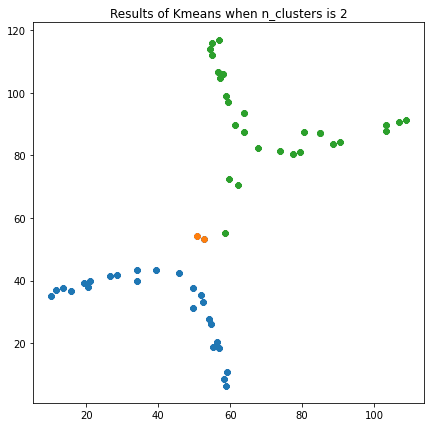

In [18]:
plt.figure(figsize = (7,7))
for label in loc_df2.label.unique():
    plt.plot(loc_df2.longitude[loc_df2.label==label],loc_df2.latitude[loc_df2.label==label],'.',markersize = 10)
plt.title('Results of Kmeans when n_clusters is 2')
plt.show()

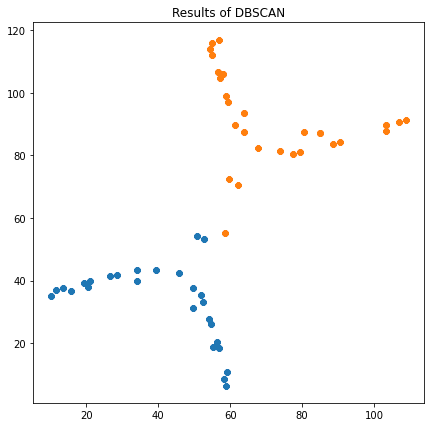

In [34]:
dbscan = skc.DBSCAN(eps =16, min_samples=200).fit(train_df_features)
label2 = dbscan.labels_
loc_df2 = pd.DataFrame()
loc_df2['longitude'] = train_df.LONGITUDE
loc_df2['latitude'] = train_df.LATITUDE
loc_df2['label'] = label2
plt.figure(figsize = (7,7))
for label in loc_df2.label.unique():
    plt.plot(loc_df2.longitude[loc_df2.label==label],loc_df2.latitude[loc_df2.label==label],'.',markersize = 10)
plt.title('Results of DBSCAN')
plt.show()